<a href="https://colab.research.google.com/github/VangaSravani07/PRODIGY_TrackCode_03/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [19]:
def generate_dummy_images(n_samples=1000, img_size=(64, 64)):
    np.random.seed(42)
    X = []
    y = []
    for _ in range(n_samples):
        # Class 0: 'Cat' - images with more low-frequency patterns
        if np.random.rand() < 0.5:
            img = np.random.normal(loc=100, scale=25, size=img_size)
            label = 0
        else:
            # Class 1: 'Dog' - images with more high-frequency noise
            img = np.random.normal(loc=150, scale=50, size=img_size)
            label = 1
        img = np.clip(img, 0, 255)
        X.append(img.flatten())
        y.append(label)
    return np.array(X), np.array(y)

X, y = generate_dummy_images(n_samples=1000)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00        97
         Dog       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



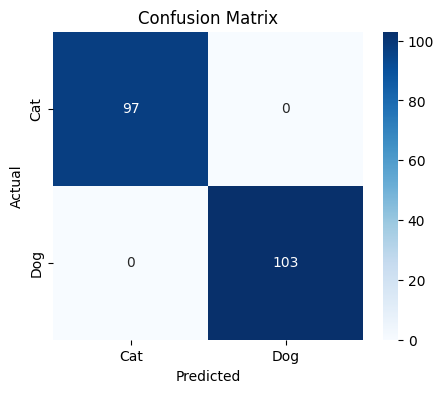

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


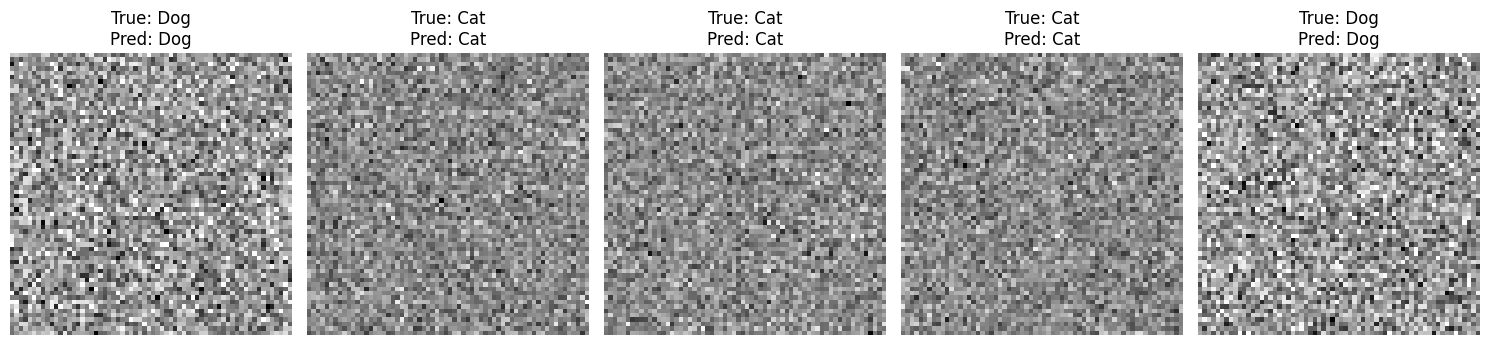

In [24]:
def show_sample_predictions(X_sample, y_true, y_pred, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        img = X_sample[i].reshape(64, 64)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {'Cat' if y_true[i]==0 else 'Dog'}\nPred: {'Cat' if y_pred[i]==0 else 'Dog'}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_predictions(X_test, y_test, y_pred)

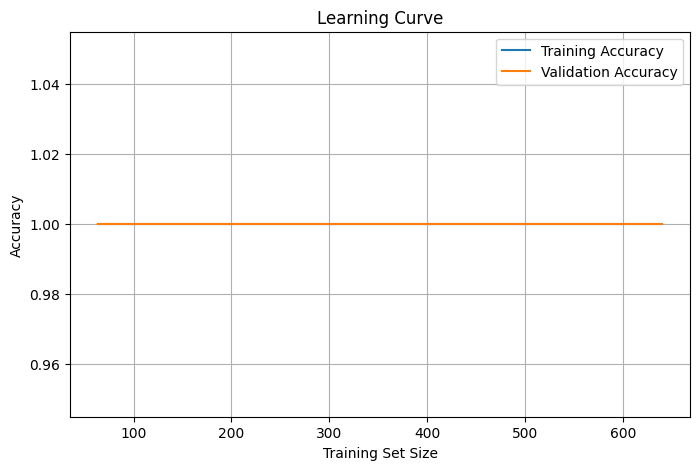

In [25]:
train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='linear'), X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

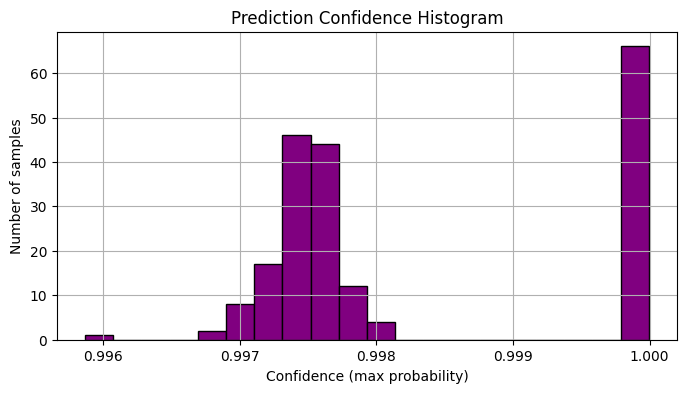

In [26]:
model_prob = SVC(kernel='linear', probability=True)
model_prob.fit(X_train, y_train)


y_proba = model_prob.predict_proba(X_test)

confidences = np.max(y_proba, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(confidences, bins=20, color='purple', edgecolor='black')
plt.title("Prediction Confidence Histogram")
plt.xlabel("Confidence (max probability)")
plt.ylabel("Number of samples")
plt.grid()
plt.show()

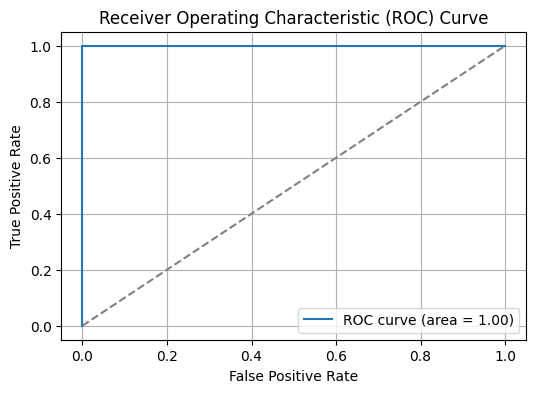

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

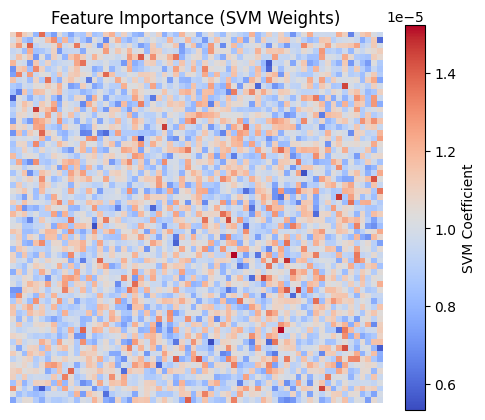

In [28]:
coeffs = model.coef_.reshape(64, 64)  # reshape to original image size

plt.figure(figsize=(6, 5))
plt.imshow(coeffs, cmap='coolwarm')
plt.colorbar(label="SVM Coefficient")
plt.title("Feature Importance (SVM Weights)")
plt.axis('off')
plt.show()